In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_str = (open(r"../data/input.txt")).read()
print(len(data_str))
data = [i for i in data_str]
data_set = sorted(set(data_str))
print("Length of vocabulary = ", len(data_set))
char_2_idx = {ch: i for i, ch in enumerate(data_set)}
idx_2_char = {i: ch for i, ch in enumerate(data_set)}

501470
Length of vocabulary =  93


In [5]:
import os.path

In [3]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [4]:
data = np.array([char_2_idx[i] for i in data_str])
train_data = data[0:int(0.8 * len(data))]
y_train = data[1:int(0.8 * len(data)) + 1]

In [6]:
train_data.shape

(401176,)

In [7]:
train_data = to_categorical(train_data, len(data_set))
val_data = data[int(0.8 * len(data)):-1]
y_val = data[int(0.8 * len(data)) + 1:]

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
val_data

array([26, 80, 67, ..., 67, 76, 66])

In [13]:
batch_size = 25
length_to_keep = int(len(train_data) / batch_size) * len(data_set)*batch_size
train_data = train_data[0:int(length_to_keep / len(data_set)), :].copy()
train_data = np.reshape(train_data, (int(len(train_data) / batch_size), batch_size, len(data_set)))

In [15]:
train_data.shape

(16047, 25, 93)

In [34]:
X = train_data[:, :-1, :]
y = train_data[:, 1:, :]
X_val = to_categorical(val_data, len(data_set))
length_to_keep = int(len(X_val) / batch_size) * len(data_set)* batch_size
X_val = X_val[0:int(length_to_keep / len(data_set)), :].copy()
X_val = np.reshape(X_val, (int(len(X_val) / batch_size), batch_size, len(data_set)))
y_val = X_val[:, 1:, :]
X_val = X_val[:, :-1, :]

In [23]:
import importlib

SPLIT LINE

In [53]:
#import utils
importlib.reload(utils)

<module 'utils' from 'D:\\Resource\\Courses\\UCSD\\2nd_Quarter\\253\\pa4\\DeepMusic\\utils.py'>

In [54]:
xtr, ytr, xva, yva = utils.get_dateset()

In [56]:
yva.shape

(4011, 24, 93)

In [60]:
y_val==yva

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True, 

In [46]:
xtr.shape

(16047, 24, 93)

In [28]:
enc = OneHotEncoder()

In [29]:
t = enc.fit_transform(np.reshape(train_data, (-1,1)))

In [26]:
t = enc.transform(np.reshape(train_data, (-1,1))).toarray()

In [30]:
train_data_k == t

matrix([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [31]:
train_data_k

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

What if I tried on Keras?

In [62]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN, LSTM
from keras.callbacks import History
from keras import backend as K

In [64]:
# RNN Model
epochs = 100
vocab_size = len(data_set)
input_dim = vocab_size
output_dim = vocab_size
hidden_dim = 100

rnn_model = Sequential()
rnn_model.add(LSTM(hidden_dim, input_shape=(None, vocab_size)))
# rnn_model.add(SimpleRNN(hidden_dim, activation='tanh', return_sequences=True, input_shape=(None, vocab_size)))
rnn_model.add(Dense(output_dim))
rnn_model.add(Activation('softmax'))
rnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
rnn_model.summary()
print('Training')
modelhistory = History()
history = rnn_model.fit(xtr, ytr[:, -1, :], batch_size=128, nb_epoch=epochs, validation_data=(xva, yva[:, -1, :]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               77600     
_________________________________________________________________
dense_2 (Dense)              (None, 93)                9393      
_________________________________________________________________
activation_2 (Activation)    (None, 93)                0         
Total params: 86,993
Trainable params: 86,993
Non-trainable params: 0
_________________________________________________________________
Training


D:\SOFTWARE\Conda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 16047 samples, validate on 4011 samples
Epoch 1/100
16047/16047 [==============================] - 20s 1ms/step - loss: 3.7263 - acc: 0.1335 - val_loss: 3.4945 - val_acc: 0.1274
Epoch 2/100
16047/16047 [==============================] - 14s 893us/step - loss: 3.3702 - acc: 0.1474 - val_loss: 3.2814 - val_acc: 0.1391
Epoch 3/100
16047/16047 [==============================] - 17s 1ms/step - loss: 3.2068 - acc: 0.1689 - val_loss: 3.1275 - val_acc: 0.1608
Epoch 4/100
16047/16047 [==============================] - 16s 968us/step - loss: 3.0575 - acc: 0.2003 - val_loss: 2.9718 - val_acc: 0.1852
Epoch 5/100
16047/16047 [==============================] - 16s 981us/step - loss: 2.9076 - acc: 0.2259 - val_loss: 2.8726 - val_acc: 0.1985
Epoch 6/100
16047/16047 [==============================] - 16s 972us/step - loss: 2.7802 - acc: 0.2541 - val_loss: 2.7680 - val_acc: 0.2319
Epoch 7/100
16047/16047 [==============================] - 16s 976us/step - loss: 2.6687 - acc: 0.2813 - val_loss: 

Epoch 59/100
16047/16047 [==============================] - 15s 953us/step - loss: 0.7692 - acc: 0.7777 - val_loss: 2.7651 - val_acc: 0.3403
Epoch 60/100
16047/16047 [==============================] - 16s 987us/step - loss: 0.7533 - acc: 0.7868 - val_loss: 2.7724 - val_acc: 0.3458
Epoch 61/100
16047/16047 [==============================] - 15s 952us/step - loss: 0.7377 - acc: 0.7896 - val_loss: 2.7881 - val_acc: 0.3473
Epoch 62/100
16047/16047 [==============================] - 15s 938us/step - loss: 0.7157 - acc: 0.7967 - val_loss: 2.8758 - val_acc: 0.3411
Epoch 63/100
16047/16047 [==============================] - 15s 940us/step - loss: 0.6909 - acc: 0.8075 - val_loss: 2.8479 - val_acc: 0.3413
Epoch 64/100
16047/16047 [==============================] - 15s 935us/step - loss: 0.6754 - acc: 0.8108 - val_loss: 2.9086 - val_acc: 0.3416
Epoch 65/100
16047/16047 [==============================] - 15s 936us/step - loss: 0.6564 - acc: 0.8162 - val_loss: 2.9205 - val_acc: 0.3366
Epoch 66/100


In [66]:
def sample(preds, temperature):
    # Helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Function to get rnn layer output
get_rnn_layer_output = K.function([rnn_model.layers[0].input], [rnn_model.layers[0].output])
prime_len = 25
gen_len = 900
start_index = 0
d = 0
rnn_activations = []
# T is Temperature parameter for Softmax layer.
for T in [1.0]:
    d += 1
    generated = ''
    sentence = data_str[start_index: start_index + prime_len]
    generated += sentence
    print('Generating with seed: "' + sentence + '"')

    for i in range(gen_len):
        x = np.zeros((1, prime_len, len(data_set)))
        for t, char in enumerate(sentence):
            x[0, t, char_2_idx[char]] = 1.

        preds = rnn_model.predict(x, verbose=0)[0]
        layer_output = get_rnn_layer_output([x])[0]
        rnn_activations.append(layer_output[0][-1])
        next_index = sample(preds, T)
        next_char = idx_2_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

    f = open('pred_feature' + '_' + str(T) + '_' + str(d) + '.txt', 'w')
    f.write(generated)
    f.close()
    rnn_activations = np.array(rnn_activations)
    print(rnn_activations.shape)
    np.savetxt('rnn_activations_pred', rnn_activations, delimiter=',')

Generating with seed: "<start>
X:1
T: La Montfar"
(900,)


My trial

In [5]:
import importlib
#import models

In [11]:
import utils
import models
#importlib.reload(utils)

In [91]:
importlib.reload(utils)

<module 'utils' from 'D:\\Resource\\Courses\\UCSD\\2nd_Quarter\\253\\pa4\\DeepMusic\\utils.py'>

In [81]:
data = utils.get_data()
char2idx_dict, idx2char_dict = utils.get_dicts(data)

In [103]:
lstm = models.Music(voc_size=len(char2idx_dict), hidden_size=100, num_layers=1)

In [105]:
coach = utils.Trainer(lstm, char2idx_dict, idx2char_dict)

In [119]:
loss = coach.fit(data, max_iter=3000, log_freq=500)

epoch 500, loss 1.717
epoch 1000, loss 2.117
epoch 1500, loss 1.836
epoch 2000, loss 0.871
epoch 2500, loss 1.566
epoch 3000, loss 1.830


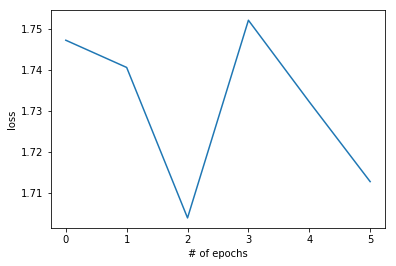

In [120]:
plt.plot([i for i in range(len(loss))], loss)
plt.xlabel('# of epochs')
plt.ylabel('loss')
#plt.legend()
plt.show()

In [122]:
tune = "<start>\n" + coach.inference(size=200, temp=.6)
print(tune)

<start>

X:49
T:France the sonde observation mailto:galouvielle@free.fr
M:4/4
L:1/8
K:D
D>F GB|d2-|
L:1/8
K:D
AB AB GB B2 :|
|:G/A/ Bc d2B | A2 G2 | c2c d2 | d2 de | d2 e2 | e3 c/B/A/ | G2 G/E/ | FE F2 | F>GA


In [59]:
s = [c for c in '<start>']
idx = coach.char2idx('<start>')
hidden = lstm.init_hidden()

In [60]:
idx

Variable containing:
 40
 60
 82
 14
  8
 82
 67
[torch.LongTensor of size 7]

In [107]:
len(data) / 25

20058.8